In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('Movie_Review.csv')

In [ ]:
data.dropna(inplace=True)

In [ ]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [ ]:
data['text'] = data['text'].apply(clean_review)

In [ ]:
from wordcloud import WordCloud

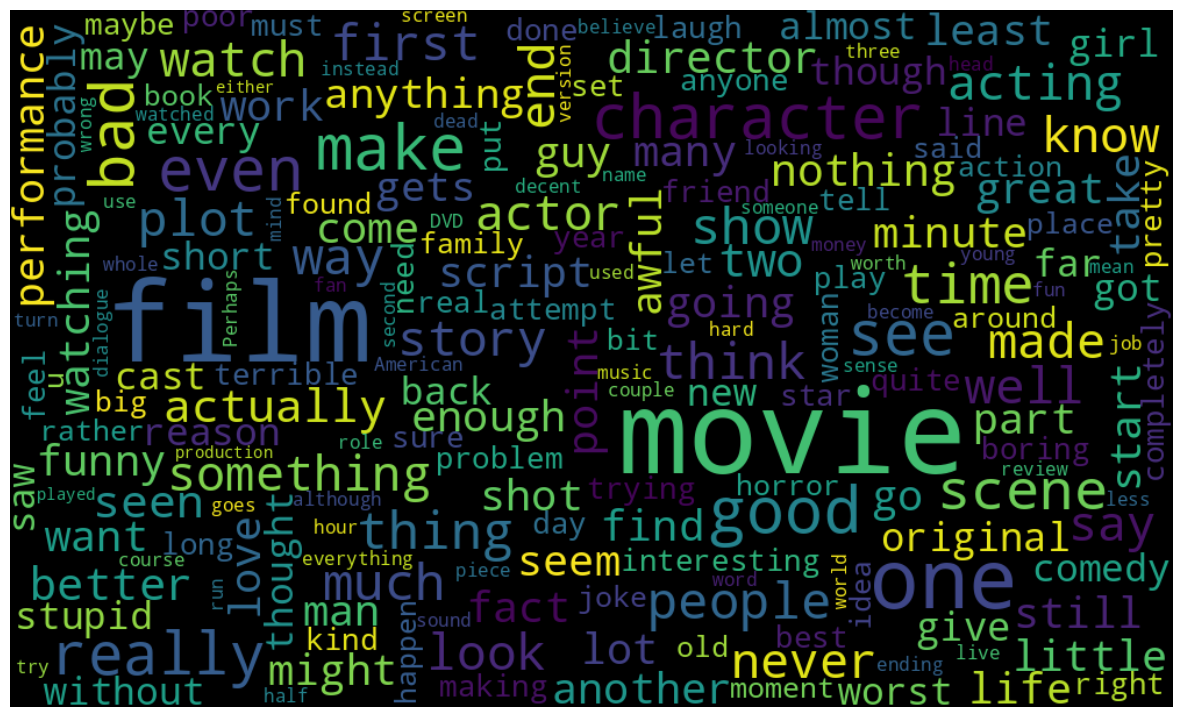

In [ ]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

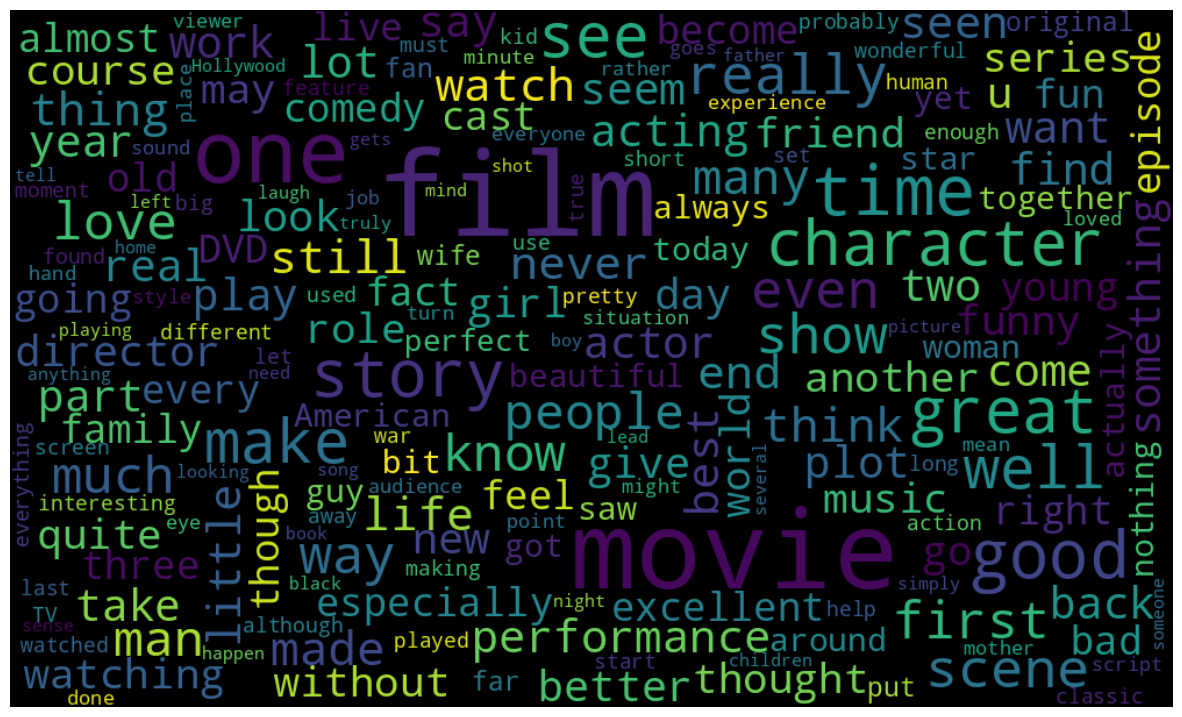

In [ ]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv = TfidfVectorizer(max_features=2500)

In [ ]:
reviews = cv.fit_transform(data['text']).toarray()

In [ ]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

In [ ]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters as needed
kmeans.fit(reviews)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
clusters_test = kmeans.predict(reviews)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
predicted_clusters = kmeans.labels_
conf_matrix = confusion_matrix(data['sentiment'], predicted_clusters)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[184 316]
 [113 387]]


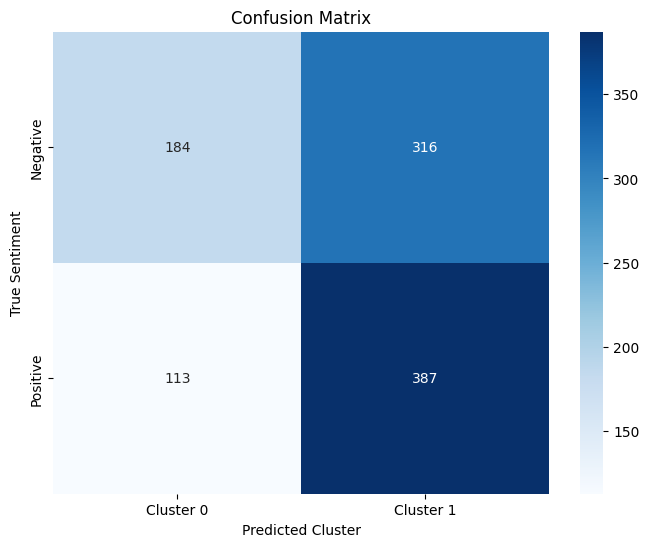

In [38]:
# Step 5: Visualize the Clusters
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(data['sentiment'], predicted_clusters)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cluster 0", "Cluster 1"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Cluster")
plt.ylabel("True Sentiment")
plt.title("Confusion Matrix")
plt.show()